                                            TALLER #3  - CATALINA FLÓREZ Y GABRIEL BORRERO - PUNTO 2

2.1) Simular...

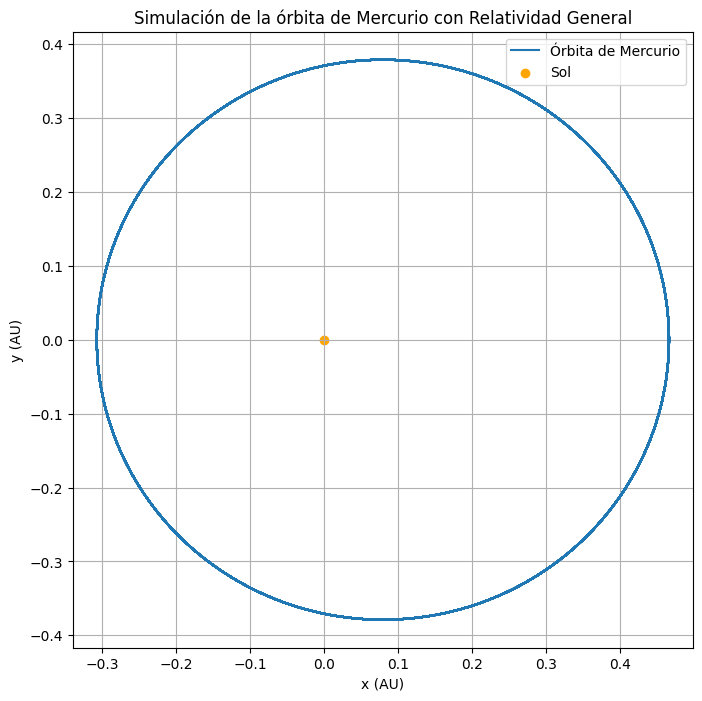

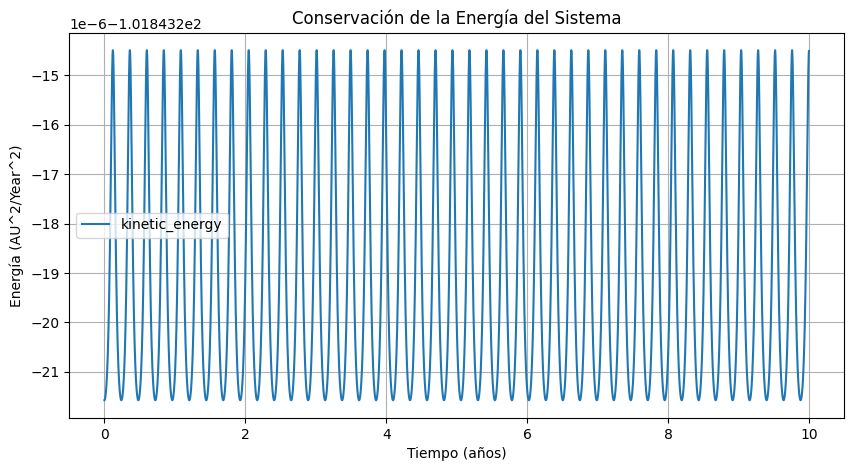

In [80]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

mu = 39.4234021  # Constante gravitacional GM en unidades Au^3/Year^2
alpha = 1.09778201*10**(-8) # Factor de relatividad general en unidades Au^2
a = 0.38709893  # Semieje mayor en unidades AU
e = 0.20563069  # Excentricidad

#Posiciones y velocidades iniciales
x0 = a * (1 + e)  # Posición inicial en x
y0 = 0.0  # Posición inicial en y
vx0 = 0.0  # Velocidad inicial en x
vy0 = np.sqrt((mu / a)*((1 - e) / (1 + e)))


def EDO_mov(t, y, mu, alpha):
    x, y, vx, vy = y
    
    #definición del vector r
    r_vector = np.array([x,y])
    r=np.linalg.norm(r_vector)
    r_unitario= r_vector/r
    
    
    #Aceleración en x y en y
  
    ax = -(mu/r**2) * (1 + alpha / r**2) * r_unitario[0]
    ay = -(mu/r**2) * (1 + alpha / r**2) * r_unitario[1]
    
    return [vx, vy, ax, ay]


#Aquí resolvemos la ecuación diferencial. 
sol = solve_ivp(EDO_mov, t_span = (0., 10.), y0 = [x0, y0, vx0, vy0], args=(mu, alpha), method='RK45',max_step=0.0001)

#Extraemos las posiciones y velocidades
x_sol = sol.y[0]
y_sol = sol.y[1]
vx_sol = sol.y[2]
vy_sol = sol.y[3]

#Finalmente, graficamos la órbita de Mercurio

plt.figure(figsize=(8, 8))
plt.plot(x_sol, y_sol, label='Órbita de Mercurio')
plt.scatter(0, 0, color='orange', label='Sol')
puntos = np.linspace(0, 4, 82)
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.title('Simulación de la órbita de Mercurio con Relatividad General')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

#Cálculo de la energía total (Para observar si nuestros resultados son correctos)
kinetic_energy = (vx_sol**2 + vy_sol**2)-2*mu/np.sqrt(x_sol**2 + y_sol**2)

#Graficamos la conservación de la energía
plt.figure(figsize=(10, 5))
plt.plot(sol.t, kinetic_energy, label='kinetic_energy')
plt.xlabel('Tiempo (años)')
plt.ylabel('Energía (AU^2/Year^2)')
plt.title('Conservación de la Energía del Sistema')
plt.legend()
plt.grid(True)
plt.show()


2.2) Precesión de la órbita

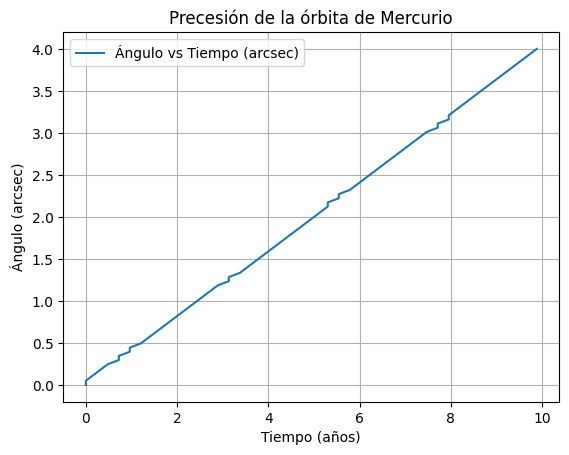

La pendiente de la recta o también llamada Precesión anómala: 43.1787 arcsec/siglo
Diferencia con el valor observado: 0.1988 arcsec/siglo


In [81]:
r_dot_v = x_sol * vx_sol + y_sol * vy_sol


indices_cercanos = np.where(np.abs(r_dot_v) < 1e-3)[0]


angles = np.arctan2(y_sol[indices_cercanos], x_sol[indices_cercanos])


adjusted_angles = []
for angle in angles:
    if np.abs(angle - np.pi) < 0.1:  # Cercano a pi (perihelio)
        adjusted_angles.append(angle - np.pi)
    elif np.abs(angle) < 0.1: 
        adjusted_angles.append(angle)
    elif np.abs(angle - 2*np.pi) < 0.1:  # Cercano a 0 o 2pi (afelio)
        adjusted_angles.append(angle - 2*np.pi)
    else:
        adjusted_angles.append(angle)


adjusted_angles = np.array(adjusted_angles)
angles_deg = np.degrees(adjusted_angles)
angles_arcsec = angles_deg * 3600


from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(sol.t[indices_cercanos], angles_arcsec)

plt.plot(sol.t[indices_cercanos] , puntos, label='Ángulo vs Tiempo (arcsec)')
plt.xlabel('Tiempo (años)')
plt.ylabel('Ángulo (arcsec)')
plt.title('Precesión de la órbita de Mercurio')
plt.legend()
plt.grid(True)
plt.show()


precesion_anomala = slope  # arcsec/año
precesion_anomala_siglo = np.abs(precesion_anomala * 0.01)  # arcsec/siglo
print("La pendiente de la recta o también llamada " + f"Precesión anómala: {precesion_anomala_siglo:.4f} arcsec/siglo")



valor_observado = 42.9799  # arcsec/siglo
diferencia = np.abs(precesion_anomala_siglo - valor_observado)
print(f"Diferencia con el valor observado: {diferencia:.4f} arcsec/siglo")

  

El resultado de 43.1787 arcsec/siglo obtenido es muy cercano al valor observado de 42.9799 arcsec / siglo para la precesión anómala de Mercurio, indicando que nuestro análisis es consistente con las observaciones científicas. La pequeña discrepancia puede deberse a errores de redondeo o precisión, pero no es significativa dado que la gráfica es lineal y aparentemente sin ruido, lo que sugiere una correcta conversión y ajuste de datos. Este resultado demuestra que el modelo y cálculos son adecuados y reflejan correctamente el fenómeno observado.